<a href="https://www.kaggle.com/code/teeshifeng/yahoo-finance-stock-data-extraction?scriptVersionId=96914995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install yfinance
import yfinance as yf
from datetime import datetime

  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=5db54821bd5437439c6b2eea49d3dfd29ff0b5c5a063d566a7fcdb59eacc8f19
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
TSLA = yf.download(tickers = 'TSLA', start='2012-01-01',end=datetime.today().strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed


In [3]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#calculate Return
TSLA['Return %'] = ((TSLA['Close']-TSLA['Open'])/ TSLA['Close'])*100

In [5]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,Return %
Date,,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500,-3.062677
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500,-1.804410
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500,-2.359887
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500,-1.077668
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000,0.917426


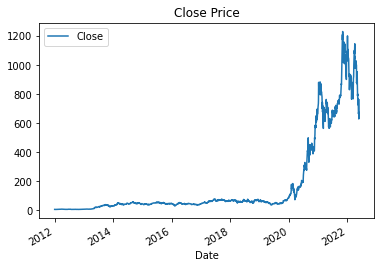

In [6]:
#Plot
ax1 = TSLA['Close'].plot(style = '-')
plt.title('Close Price')
ax1.legend()
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

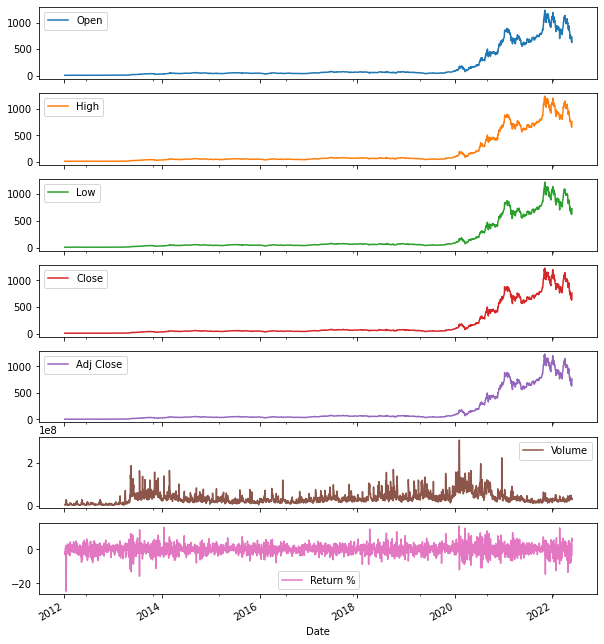

In [7]:
TSLA.plot(subplots = True, figsize = (10,12))

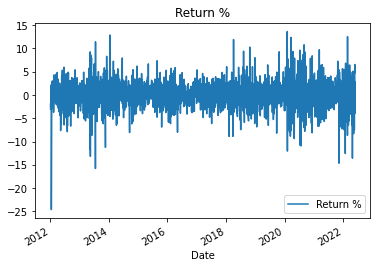

In [8]:
#Plot
ax1 = TSLA['Return %'].plot(style = '-')
plt.title('Return %')
ax1.legend()
plt.show()

<AxesSubplot:>

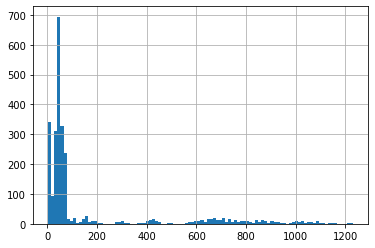

In [9]:
TSLA['Close'].hist(bins = 100)

<AxesSubplot:>

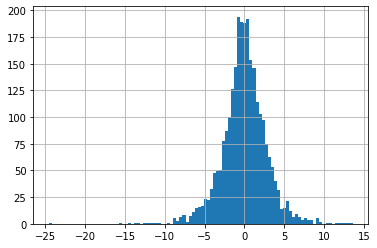

In [10]:
TSLA['Return %'].hist(bins = 100)

<AxesSubplot:ylabel='Density'>

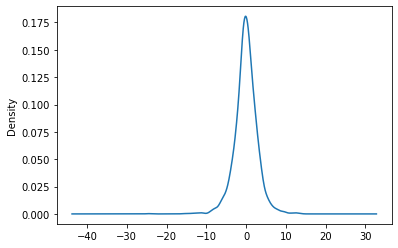

In [11]:
TSLA['Return %'].plot(kind = 'kde')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Return %'>

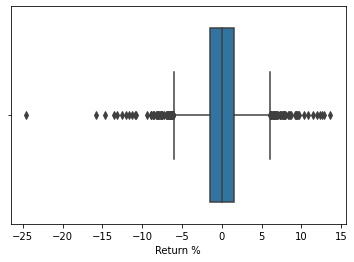

In [12]:
import seaborn as sns
sns.boxplot(TSLA['Return %'])

In [13]:
TSLA['Close'].diff(1)

Date
2012-01-03          NaN
2012-01-04    -0.074000
2012-01-05    -0.118000
2012-01-06    -0.042000
2012-01-09     0.068000
                ...    
2022-05-23    11.000000
2022-05-24   -46.740051
2022-05-25    30.640015
2022-05-26    48.929993
2022-05-27    51.900024
Name: Close, Length: 2619, dtype: float64

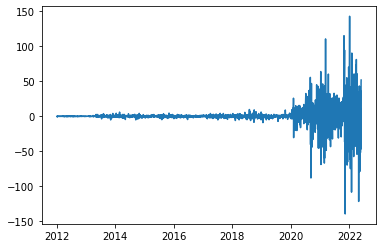

In [14]:
plt.plot(TSLA['Close'].diff(1))

In [15]:
Weekly = TSLA.resample('W').mean()
Weekly

,Open,High,Low,Close,Adj Close,Volume,Return %
Date,,,,,,,
2012-01-08,5.605500,5.694500,5.420500,5.491000,5.491000,4437500.0,-2.076160
2012-01-15,5.557600,5.630000,5.244800,5.365600,5.365600,8470800.0,-4.340053
2012-01-22,5.370000,5.448000,5.283500,5.338500,5.338500,9775500.0,-0.590570
2012-01-29,5.491200,5.688000,5.463600,5.617200,5.617200,4083300.0,2.214093
2012-02-05,5.943600,6.060800,5.850400,5.984800,5.984800,3778800.0,0.653437
...,...,...,...,...,...,...,...
2022-05-01,935.041992,952.204004,883.871997,900.844006,900.844006,32954660.0,-3.956761
2022-05-08,898.782007,923.907996,864.542017,900.748010,900.748010,25763080.0,0.090741
2022-05-15,785.047998,805.553992,742.834009,763.747998,763.747998,33647000.0,-2.756886


In [16]:
Monthly = TSLA.resample('M').mean()
Monthly

,Open,High,Low,Close,Adj Close,Volume,Return %
Date,,,,,,,
2012-01-31,5.551200,5.654100,5.391900,5.498000,5.498000,6.402475e+06,-1.194067
2012-02-29,6.502900,6.641700,6.363500,6.552400,6.552400,5.798400e+06,0.754284
2012-03-31,7.027000,7.156818,6.916455,7.048182,7.048182,5.037159e+06,0.281275
2012-04-30,6.730000,6.826700,6.595600,6.699000,6.699000,5.688225e+06,-0.486954
2012-05-31,6.212000,6.343000,6.028000,6.154727,6.154727,7.769386e+06,-0.983280
...,...,...,...,...,...,...,...
2022-01-31,1019.310001,1047.037000,979.561502,1010.168497,1010.168497,3.193344e+07,-1.008016
2022-02-28,878.368421,903.860525,854.696318,878.884737,878.884737,2.440573e+07,0.032763
2022-03-31,909.759996,933.997821,889.799131,914.379554,914.379554,2.506193e+07,0.422904


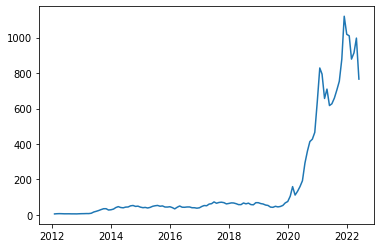

In [17]:
plt.plot(Monthly['Close'])